FAKE NEWS CLASSIFIER </br>
Name: Zuhayer Alvi </br>
CSC 44800

In [1]:
# Import needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
# load both datasets
df_true = pd.read_csv('datasets/True.csv')
df_fake = pd.read_csv('datasets/Fake.csv')

In [3]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [4]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
# insert a column to identify the class of the data
# 1 for true and 0 for fake
df_true['class'] = 1
df_fake['class'] = 0

In [8]:
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
# Combine the datasets
merged_df = pd.concat([df_true, df_fake], ignore_index=True)

In [11]:
# Shuffle the dataset
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

In [12]:
merged_df.head(10)

,title,text,subject,date,class
0,"Yemen Houthis say Sanaa airport repaired, read...","ADEN (Reuters) - Yemen s Sanaa airport, damage...",worldnews,"November 21, 2017",1
1,Pro-Houthi fighters call powerful Yemen ally '...,DUBAI (Reuters) - Fighters loyal to the armed ...,worldnews,"August 23, 2017",1
2,Shocking Report: Mind Blowing Cost of Illegals...,EVERY American taxpayer should be outraged at ...,politics,"Sep 27, 2017",0
3,Southside Chicago Blacks Fight Against Liberal...,Rebel Pundit decided to follow a local activis...,left-news,"Aug 26, 2017",0
4,Boiler Room EP #122 – Charlottesville & The Hi...,Tune in to the Alternate Current Radio Network...,US_News,"August 17, 2017",0
5,WATCH JUDGE ORDER PUNK WEARING “POLICE LIE” T-...,The hate for our law enforcement is at an all ...,Government News,"May 18, 2015",0
6,Spicer Wears National Symbol Of ‘Distress’ On...,Is Sean Spicer secretly sending America a cry ...,News,"March 10, 2017",0
7,Trump Just Got Caught Trying To Blackmail Mor...,Blackmail is a crime. It s time to impeach Don...,News,"June 30, 2017",0
8,White House hopeful Trump nears end of vice pr...,WASHINGTON (Reuters) - Republican Donald Trump...,politicsNews,"July 13, 2016",1
9,Hurdles high for Merkel in three-way 'Jamaica'...,BERLIN (Reuters) - Germany s conservative chan...,worldnews,"September 24, 2017",1


C:\Users\zuzu\AppData\Local\Temp\ipykernel_23844\242353132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=merged_df, palette='Set2')


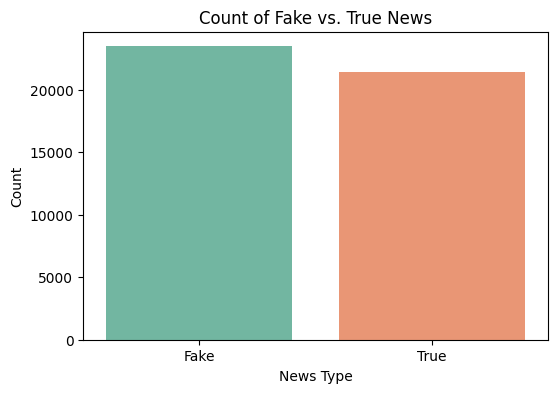

In [34]:
# Visualize the count of fake news vs. true news
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=merged_df, palette='Set2')
plt.xticks([0, 1], ['Fake', 'True'])
plt.title('Count of Fake vs. True News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

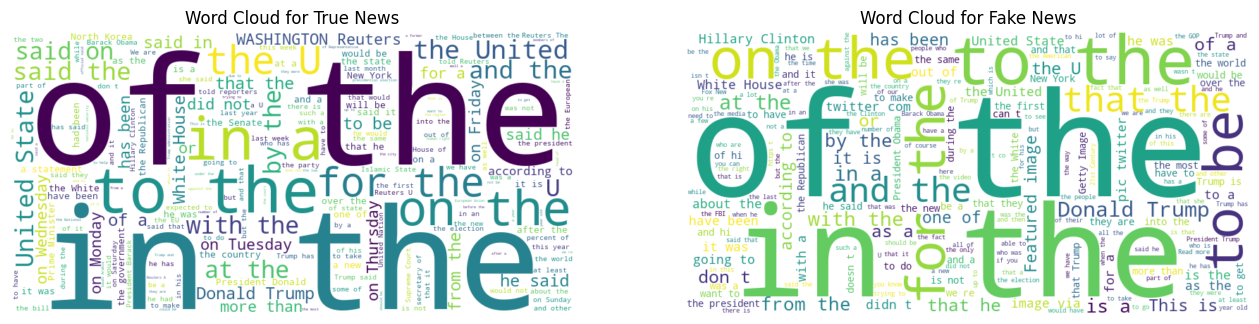

In [13]:
# Generate WordClouds for True and Fake news
true_text = " ".join(df_true['text'].astype(str))
fake_text = " ".join(df_fake['text'].astype(str))

true_wc = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(true_text)
fake_wc = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(fake_text)

# Plot WordClouds
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(true_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News')

plt.subplot(1, 2, 2)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')

plt.show()

In [14]:
# Use the 'text' column for modeling
X = merged_df['text']
y = merged_df['class']

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
# Build and train the Logistic Regression model
model_1 = LogisticRegression()
model_1.fit(X_train_tfidf, y_train)

LogisticRegression()

In [18]:
# Make predictions
y_pred = model_1.predict(X_test_tfidf)

In [19]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9857461024498887
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4649
           1       0.98      0.99      0.99      4331

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



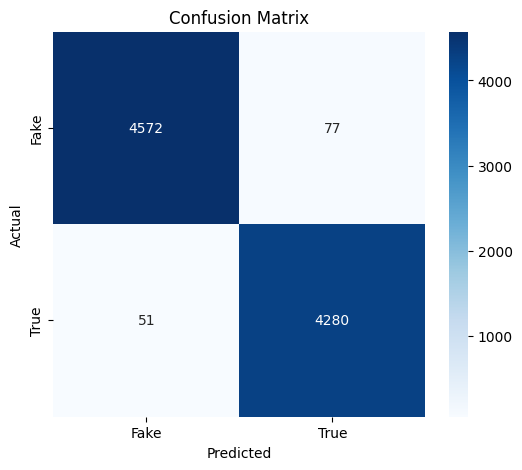

In [20]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 1.00


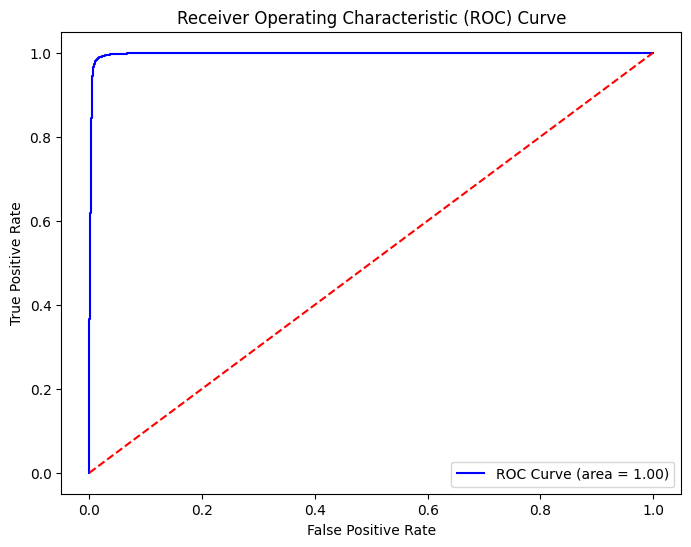

In [21]:
# Plot ROC curve
y_prob = model_1.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"AUC Score: {roc_auc:.2f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [22]:
# Build and train the Random Forest model
model_2 = RandomForestClassifier()
model_2.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [23]:
# Make predictions
y_pred = model_2.predict(X_test_tfidf)

In [24]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9891982182628062
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4649
           1       0.99      0.99      0.99      4331

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



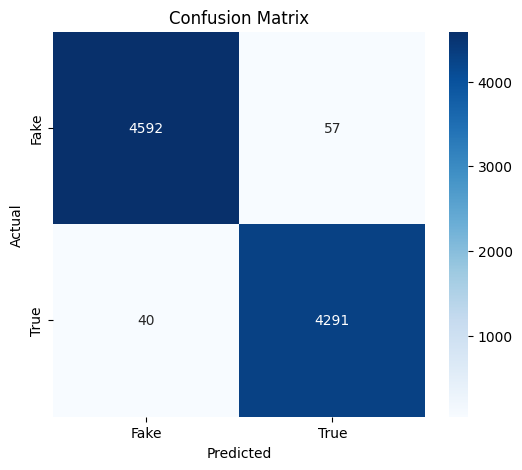

In [25]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 1.00


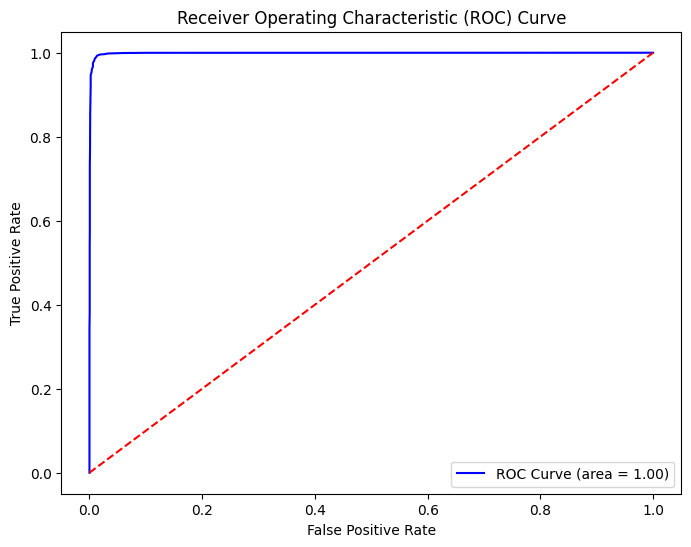

In [26]:
# Plot ROC curve
y_prob = model_2.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"AUC Score: {roc_auc:.2f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()